# Issue 383 Optimum LAI versus trim increment

Goals:
- Show master and optimum branch comparison
    - Trimming for various size classes
    - LAI by leaf layer
- Show google sheet fractional comparison
- Show deciduous works

## Setup

Load up the necessary packages

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import netcdf
plt.rcParams["figure.figsize"]=15,20

Load in the data

In [40]:
file_master = '/home/gregorylemieux/Work/Issues/383/concat-032020-master.nc' # master branch 30 year run
file_optimum = '/home/gregorylemieux/Work/Issues/383/concat-032020-optimum.nc' # 022bb723 commit hash (30 year run)
ncfile_master = netcdf.netcdf_file(file_master,'r',mmap=False)
ncfile_optimum = netcdf.netcdf_file(file_optimum,'r',mmap=False)

Copy variables to main memory

In [41]:
# Condense copy into a function
def loadncvar(netcdf_file,variablename):
        var = netcdf_file.variables[variablename]
        varcopy = var[:].copy()
        return varcopy

In [42]:
# TLAI
tlai_master = loadncvar(ncfile_master,'TLAI')
tlai_optimum = loadncvar(ncfile_optimum,'TLAI')

# LAI
laisha_master = loadncvar(ncfile_master,'LAISHA')
laisun_master = loadncvar(ncfile_master,'LAISUN')
lai_scls_can_master = loadncvar(ncfile_master,'LAI_CANOPY_SCLS')
lai_scls_und_master = loadncvar(ncfile_master,'LAI_UNDERSTORY_SCLS')
laisha_optimum = loadncvar(ncfile_optimum,'LAISHA')
laisun_optimum = loadncvar(ncfile_optimum,'LAISUN')
lai_scls_can_optimum = loadncvar(ncfile_optimum,'LAI_CANOPY_SCLS')
lai_scls_und_optimum = loadncvar(ncfile_optimum,'LAI_UNDERSTORY_SCLS')

# Trimming
trim_master = loadncvar(ncfile_master,'TRIMMING')
trim_optimum = loadncvar(ncfile_optimum,'TRIMMING')

# Number of plants
nplants_scls_master = loadncvar(ncfile_master,'NPLANT_SCLS')
nplants_scls_can_master = loadncvar(ncfile_master,'NPLANT_CANOPY_SCLS')
nplants_scls_und_master = loadncvar(ncfile_master,'NPLANT_UNDERSTORY_SCLS')
nplants_scls_optimum = loadncvar(ncfile_optimum,'NPLANT_SCLS')
nplants_scls_can_optimum = loadncvar(ncfile_optimum,'NPLANT_CANOPY_SCLS')
nplants_scls_und_optimum = loadncvar(ncfile_optimum,'NPLANT_UNDERSTORY_SCLS')

Close files

In [43]:
ncfile_master.close()
ncfile_optimum.close()

In [80]:
nplants_scls_can_master[:,1]

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.11219604e+03],
       [1.72272180e+03],
       [8.37576111e+02],
       [1.08615208e+01],
       [5.95854998e+00],
       [2.19488072e+00],
       [1.05330839e+01],
       [1.92007446e+01],
       [2.30017262e+01],
       [2.76567631e+01],
       [3.33103905e+01],
       [4.07330017e+01],
       [5.58830261e+01],
       [6.14626656e+01],
       [1.08431442e+02],
       [8.17687607e+01],
       [2.84688258e+00],
       [4.84476318e+01],
       [8.91549606e+01],
       [1.08862923e+02],
       [1.28187302e+02],
       [8.77657547e+01],
       [5.17080486e-01],
       [6.87822759e-01],
       [1.04567039e+00],
       [1.33693242e+00],


## Comparison Plots

In [62]:
def plotcompare(master,optimum,titlestring,ylabelstring):
    plt.plot(master,label='master')
    plt.plot(optimum,label='optimum')
    plt.grid()
    plt.title(titlestring)
    plt.ylabel(ylabelstring)
    plt.xlabel('Time [months]')
    plt.legend()

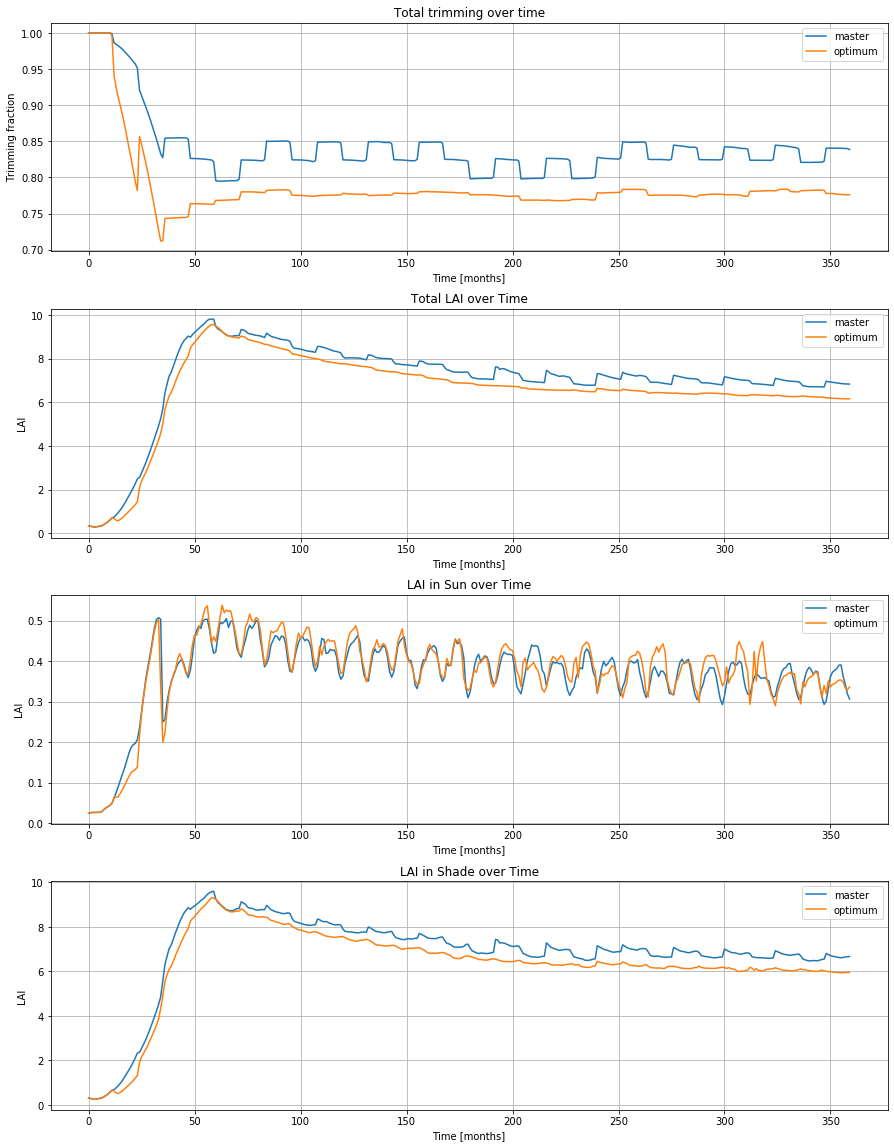

In [73]:
# LAI and trimming plots
plt.subplot(4,1,1)
plotcompare(trim_master,trim_optimum,'Total trimming over time','Trimming fraction')
plt.subplot(4,1,2)
plotcompare(tlai_master,tlai_optimum,'Total LAI over Time','LAI')
plt.subplot(4,1,3)
plotcompare(laisun_master,laisun_optimum,'LAI in Sun over Time','LAI')
plt.subplot(4,1,4)
plotcompare(laisha_master,laisha_optimum,'LAI in Shade over Time','LAI')
plt.subplots_adjust(hspace = 0.25)